In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.shape

(1728, 7)

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [13]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
X = df.drop(['class'], axis=1)

y = df['class']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [19]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [21]:
import category_encoders as ce

In [22]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [23]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [24]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=0)

clf_gini.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [86]:
y_pred_gini = clf_gini.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_gini)

0.9422066549912435

In [88]:
y_pred_train_gini = clf_gini.predict(X_train)

accuracy_score(y_train, y_pred_train_gini)

1.0

[Text(0.35993975903614456, 0.9615384615384616, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.34789156626506024, 0.8846153846153846, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.35391566265060237, 0.9230769230769231, 'True  '),
 Text(0.37198795180722893, 0.8846153846153846, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.36596385542168675, 0.9230769230769231, '  False'),
 Text(0.35993975903614456, 0.8076923076923077, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.10240963855421686, 0.7307692307692307, 'x[1] <= 2.5\ngini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.03614457831325301, 0.6538461538461539, 'x[0] <= 1.5\ngini = 0.259\nsamples = 131\nvalue = [20, 0, 111, 0]'),
 Text(0.024096385542168676, 0.5769230769230769, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 70, 0]'),
 Text(0.04819277108433735, 0.5769230769230769, 'x[1] <= 1.5\ngini = 0.441\nsam

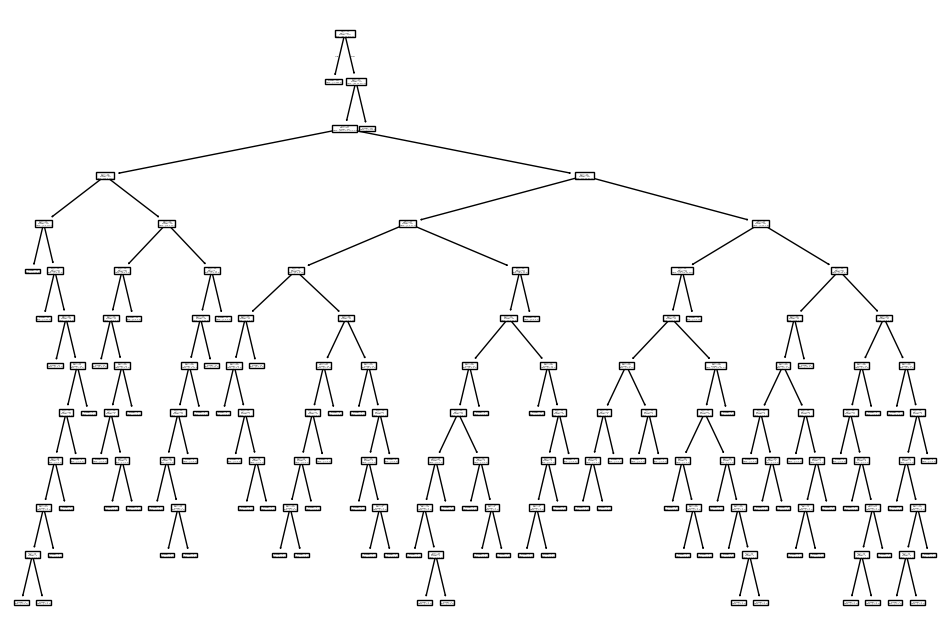

In [89]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print(cm)

[[108  11   9   1]
 [  0  19   0   1]
 [  6   0 391   0]
 [  3   2   0  20]]


In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.92      0.84      0.88       129
        good       0.59      0.95      0.73        20
       unacc       0.98      0.98      0.98       397
       vgood       0.91      0.80      0.85        25

    accuracy                           0.94       571
   macro avg       0.85      0.89      0.86       571
weighted avg       0.95      0.94      0.94       571



In [93]:
from sklearn.model_selection import GridSearchCV


clf = DecisionTreeClassifier(random_state=0)

In [131]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [9, 10, 11, 12, 13],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}

In [132]:
grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [133]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'ccp_alpha': [0.0, 0.001, ...], 'criterion': ['gini', 'entropy', ...], 'max_depth': [9, 10, ...], 'max_features': ['sqrt', 'log2'], ...}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [134]:
best = grid.best_estimator_

In [135]:
y_best_test = best.predict(X_test)
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.92      0.84      0.88       129
        good       0.59      0.95      0.73        20
       unacc       0.98      0.98      0.98       397
       vgood       0.91      0.80      0.85        25

    accuracy                           0.94       571
   macro avg       0.85      0.89      0.86       571
weighted avg       0.95      0.94      0.94       571

